<a href="https://colab.research.google.com/github/AnisaGustiara/ProjectStatistics/blob/main/Project_Statstics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Analisis Tarif Total Taksi dengan Model Regresi Linear**

# **Introduction**

Kenyamanan, keamanan dan efisiensi waktu menjadi alasan bagi para pengguna taksi untuk menggunakan taksi ketika menjalani aktivitas sehari-hari. Banyak faktor yang mempengaruhi dalam penentuan harga tarif taksi yang perlu dibayarkan oleh pelanggan. Oleh karena itu, pada penelitian ini akan digunakan statistik untuk mengetahui harga total pembayaran/ tarif yang harus dikeluarkan oleh pelanggan taksi serta mengetahui faktor apa saja yang berpengaruh terhadap besar kecilnya total biaya / total tarif taksi.

### Import library yang dbutuhkan

In [39]:
# Import libraries
import io

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statistics
from scipy.stats import ttest_ind

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Diable the warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [40]:
df = pd.read_csv("train.csv")
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [48]:
#missing value
df.isnull().sum()/len(df)*100

trip_duration         0.0
distance_traveled     0.0
num_of_passengers     0.0
fare                  0.0
tip                   0.0
miscellaneous_fees    0.0
total_fare            0.0
surge_applied         0.0
dtype: float64

In [7]:
df = df.dropna()
df.isna().sum() / len(df) * 100

trip_duration         0.0
distance_traveled     0.0
num_of_passengers     0.0
fare                  0.0
tip                   0.0
miscellaneous_fees    0.0
total_fare            0.0
surge_applied         0.0
dtype: float64

In [51]:
#duplikat
dupli = df.duplicated()
print(df[dupli])

        trip_duration  distance_traveled  num_of_passengers   fare  tip  \
2801            630.0               2.54                1.0  63.75    0   
3901            678.0               3.33                1.0  71.25   15   
5771            365.0               1.45                1.0  45.00    0   
6042            441.0               2.11                1.0  52.50   12   
6425            395.0               1.61                1.0  48.75    0   
...               ...                ...                ...    ...  ...   
209486          505.0               2.33                1.0  56.25    0   
209515          478.0               1.67                1.0  52.50   12   
209556         1011.0               2.88                1.0  86.25    0   
209607          687.0               3.17                1.0  71.25    0   
209635          651.0               2.27                1.0  63.75    0   

        miscellaneous_fees  total_fare  surge_applied  
2801                  6.00       69.75     

In [54]:
data = df.drop_duplicates()

In [10]:

data.duplicated().sum()

0

<Axes: >

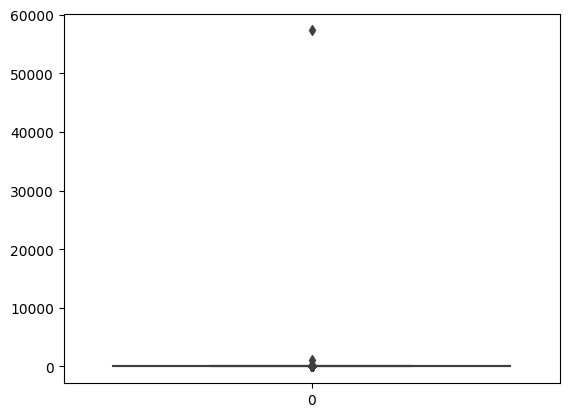

In [9]:
#Data outlier
sns.boxplot(data['distance_traveled'])

In [11]:

# Posisi data Outlier
import numpy as np
print(np.where(data['distance_traveled']>400))

(array([ 82329, 193509]),)


In [49]:
#Menemukan nilai Q1, Q3, and interquartile untuk setiap kolom
Q1 = data['distance_traveled'].quantile(q=.25)
Q3 = data['distance_traveled'].quantile(q=.75)
IQR = data['distance_traveled'].apply(stats.iqr)

#Membuang data yang diluar range
data['distance_traveled'] = data['distance_traveled'][~((data['distance_traveled'] < (Q1-1.5*IQR))
| (data['distance_traveled'] > (Q3+1.5*IQR)))]

<Axes: >

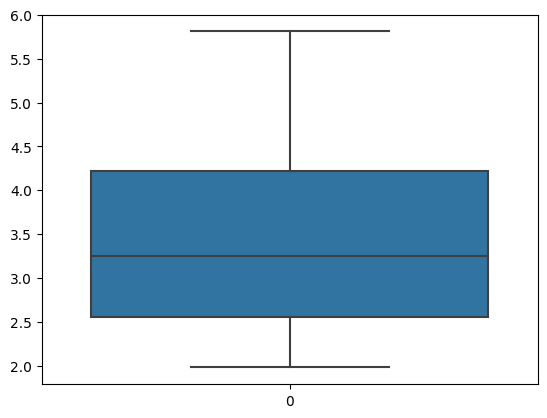

In [12]:
sns.boxplot(data['distance_traveled'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205348 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       205348 non-null  float64
 1   distance_traveled   103412 non-null  float64
 2   num_of_passengers   205348 non-null  float64
 3   fare                205348 non-null  float64
 4   tip                 205348 non-null  int64  
 5   miscellaneous_fees  205348 non-null  float64
 6   total_fare          205348 non-null  float64
 7   surge_applied       205348 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 22.2 MB


In [13]:
#Mengganti type data
data['num_of_passengers'].astype(int)
data['surge_applied'].astype(object)

0         0
1         0
2         1
3         0
4         0
         ..
209668    0
209669    1
209670    0
209671    0
209672    0
Name: surge_applied, Length: 205348, dtype: object

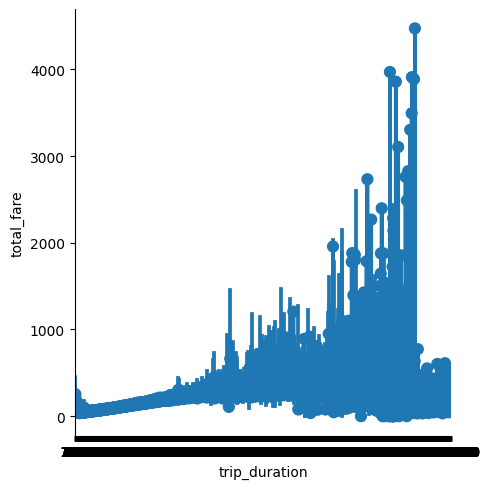

In [15]:
#EDA
#Mengetahui hubungan beberapa variabel
#duration & harga
sns.catplot(data=data, x="trip_duration", y="total_fare", kind="point")

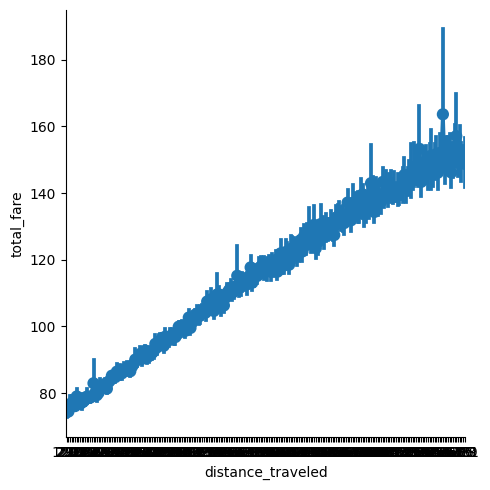

In [16]:
#jarak & harga
sns.catplot(data=data, x="distance_traveled", y="total_fare", kind="point")

<Axes: xlabel='total_fare', ylabel='num_of_passengers'>

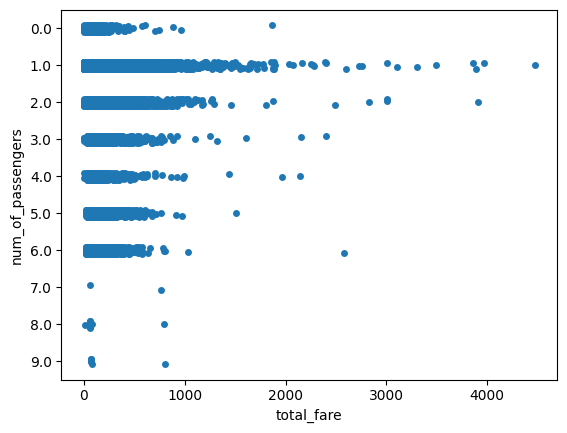

In [17]:
#jumlah penumpang & harga
sns.stripplot(data=data, x="total_fare", y="num_of_passengers", orient="h")

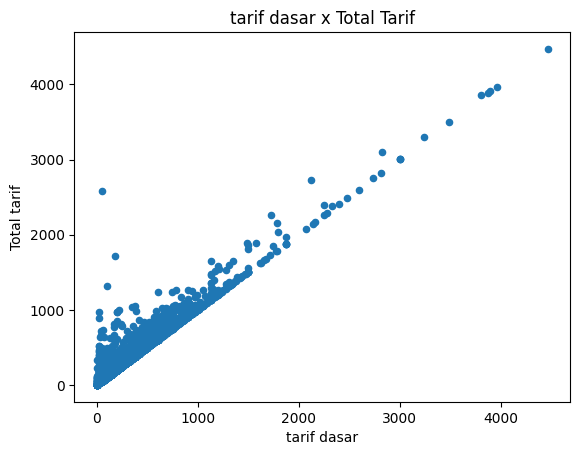

In [18]:
#tarif dasar & harga
data.plot(kind="scatter", x = "fare", y = "total_fare",
          xlabel="tarif dasar", ylabel="Total tarif", title="tarif dasar x Total Tarif");

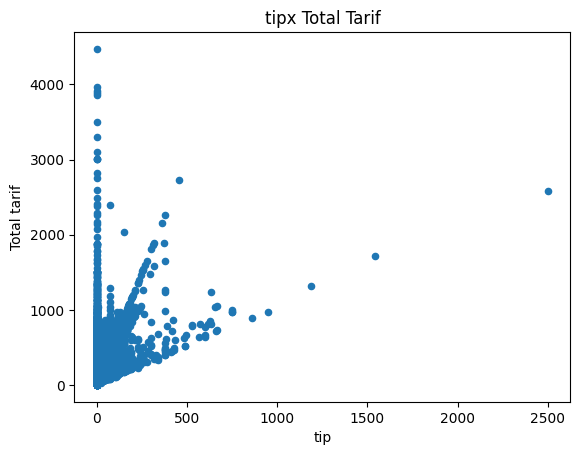

In [19]:
#tip & harga
data.plot(kind="scatter", x = "tip", y = "total_fare",
          xlabel="tip", ylabel="Total tarif", title="tipx Total Tarif");

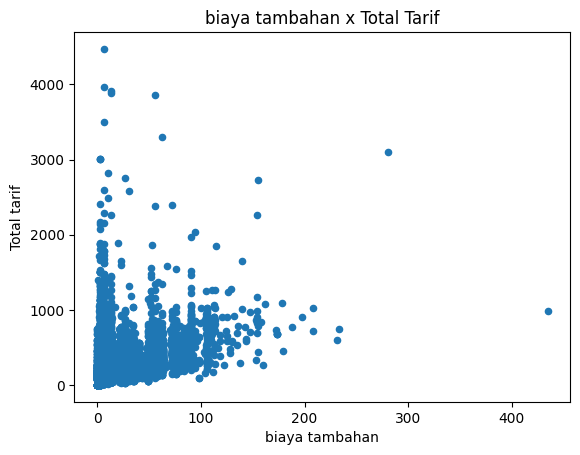

In [20]:
#biaya tambahan & harga
data.plot(kind="scatter", x = "miscellaneous_fees", y = "total_fare",
          xlabel="biaya tambahan", ylabel="Total tarif", title="biaya tambahan x Total Tarif");

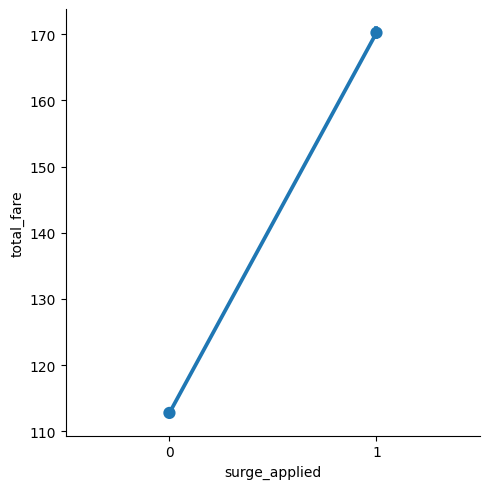

In [21]:
# total vs surge_applied
sns.catplot(data=data, x="surge_applied", y="total_fare", kind="point")

<Axes: >

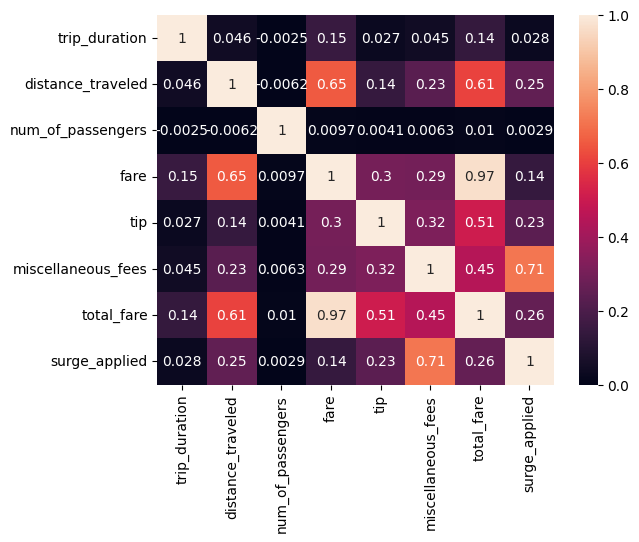

In [22]:
#Menghitung korelasi tabel
corr = data.corr()
sns.heatmap(corr, vmin=0, vmax=1, annot=True)

In [23]:
#Uji Statistika
#Apakah total harga dengan durasi di atas rata-ratanya adalah lebih tinggi dari total harga dengan durasi di bawah rata-ratanya
rt2_durasi = statistics.mean(data['trip_duration']) #menghitung rata-rata durasi

price_lower_rt2_durasi = data[data["trip_duration"] < rt2_durasi ]["total_fare"] # Membuat variabel untuk kategori total tarif dibawah rata-rata durasi.
price_upper_rt2_durasi = data[data["trip_duration"] >= rt2_durasi ]["total_fare"] # Membuat variabel untuk kategori total tarif diatas rata-rata durasi.

tstat, pValue = ttest_ind(price_upper_rt2_durasi, price_lower_rt2_durasi,  equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

alpha = 0.05
Statistik Hitung = 332.8662013004597
P Value = 0.0
kesimpulan : tolak H0


In [57]:
#Apakah total harga dengan jarak di atas rata-ratanya adalah lebih tinggi dari jarak di bawah rata-ratanya
rt2_jarak = statistics.mean(data['distance_traveled']) #menghitung rata-rata durasi

price_lower_rt2_jarak = data[data['distance_traveled'] < rt2_jarak ]["total_fare"] # Membuat variabel untuk kategori total tarif dibawah rata-rata jarak.
price_upper_rt2_jarak = data[data['distance_traveled'] >= rt2_jarak ]["total_fare"] # Membuat variabel untuk kategori total tarif diatas rata-rata jarak.

tstat, pValue = ttest_ind(price_upper_rt2_jarak, price_lower_rt2_jarak,  equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

alpha = 0.05
Statistik Hitung = 347.99332641875657
P Value = 0.0
kesimpulan : tolak H0


In [25]:
#Apakah rata-rata total harga dengan jumlah penumpang di atas rata-ratanya adalah lebih tinggi dari jumlah penumpang di bawah rata-ratanya
rt2_penumpang = statistics.mean(data['num_of_passengers']) #menghitung rata-rata durasi

price_lower_rt2_penumpang = data[data['num_of_passengers'] < rt2_penumpang ]["total_fare"] # Membuat variabel untuk kategori total tarif dibawah rata-rata jumlah penumpang.
price_upper_rt2_penumpang = data[data['num_of_passengers'] >= rt2_penumpang ]["total_fare"] # Membuat variabel untuk kategori total tarif diatas rata-rata jumlah penumpang.

tstat, pValue = ttest_ind(price_upper_rt2_penumpang, price_lower_rt2_penumpang,  equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')


alpha = 0.05
Statistik Hitung = 16.41501216837311
P Value = 8.16238637273778e-61
kesimpulan : tolak H0


In [26]:
#Apakah  total harga dengan tarif dasar di atas rata-ratanya adalah lebih tinggi dari rata-rata total harga tarif dasar di bawah rata-ratanya
rt2_tarifDsr = statistics.mean(data['fare']) #menghitung rata-rata durasi

price_lower_rt2_tarifDsr = data[data['fare'] < rt2_tarifDsr ]["total_fare"] # Membuat variabel untuk kategori total tarif dibawah rata-rata tarif dasar.
price_upper_rt2_tarifDsr = data[data['fare'] >= rt2_tarifDsr ]["total_fare"] # Membuat variabel untuk kategori total tarif diatas rata-rata tarif dasar.

tstat, pValue = ttest_ind(price_upper_rt2_tarifDsr, price_lower_rt2_tarifDsr,  equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

alpha = 0.05
Statistik Hitung = 373.6455077164086
P Value = 0.0
kesimpulan : tolak H0


In [14]:
#total tarif taksi dengan adanya biaya tambahan adalah lebih tinggi dari total tarif taksi dengan tidak ada biaya tambahan.

price_bTambah0 = data[data['miscellaneous_fees'] == 0]["total_fare"] # Membuat variabel untuk kategori total tarif tanpa biaya tambahan.
price_bTambahtdak0 = data[data['miscellaneous_fees'] > 0]['total_fare'] # Membuat variabel untuk kategori total tarif dengan biaya tambahan.

tstat, pValue = ttest_ind(price_bTambahtdak0, price_bTambah0,   equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

alpha = 0.05
Statistik Hitung = 2.0548574417717194
P Value = 0.0199470192816197
kesimpulan : tolak H0


In [62]:
#total tarif taksi dengan adanya lonjakan harga adalah lebih tinggi dari total tarif taksi dengan yang tidak ada lonjakan harga.

price_surgeAp0 = data[data.surge_applied == 'no']["total_fare"] # Membuat variabel untuk kategori total tarif tanpa lonjakan harga.
price_surgeAp1 = data[data.surge_applied == 'yes']["total_fare"] # Membuat variabel untuk kategori total tarif dengan lonjakan harga.

tstat, pValue = ttest_ind(price_surgeAp1, price_surgeAp0,   equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

alpha = 0.05
Statistik Hitung = 122.64814771541054
P Value = 0.0
kesimpulan : tolak H0


In [56]:
#total tarif taksi dengan adanya tip adalah lebih tinggi dari total tarif taksi dengan yang tidak ada tip.

price_tip0 = data[data['tip'] == 0]['total_fare']  # Membuat variabel untuk kategori total tarif tanpa tip.
price_tiptdak0 = data[data['tip'] > 0]['total_fare'] # Membuat variabel untuk kategori total tarif dengan tip.

tstat, pValue = ttest_ind(price_tiptdak0, price_tip0,   equal_var = True,  alternative= 'greater') # melakukan Uji t.

print("alpha = 0.05")

print(f"Statistik Hitung = {tstat}")
print(f"P Value = {pValue}")

if pValue > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

alpha = 0.05
Statistik Hitung = 58.64626204599466
P Value = 0.0
kesimpulan : tolak H0


In [60]:
data['surge_applied']=data['surge_applied'].replace([0,1],['no','yes'])
data['surge_applied']

0          no
1          no
2         yes
3          no
4          no
         ... 
209668     no
209669    yes
209670     no
209671     no
209672     no
Name: surge_applied, Length: 205348, dtype: object

In [64]:
#Membuat model
#Construct the model
lm = smf.ols('total_fare ~ trip_duration + distance_traveled + num_of_passengers  + tip + miscellaneous_fees + surge_applied', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             total_fare   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 2.002e+04
Date:                Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                        02:24:49   Log-Likelihood:            -1.1883e+06
No. Observations:              205348   AIC:                         2.377e+06
Df Residuals:                  205341   BIC:                         2.377e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               58.8128 